In [61]:
import pandas as pd
import os
import matplotlib.pyplot as plt

TIMESTAMP = '1643390569.2872791'
DATA_DIRECTORY = '/run/media/ture/Backup Plus/data/2022-01-29_server_training/'

perf_data = pd.read_csv(os.path.join(DATA_DIRECTORY, f'{TIMESTAMP}_performance_stats.csv'))
perf_data['timestamp'] = pd.to_datetime(perf_data['timestamp'])
perf_data.head()

,iteration,timestamp,iteration_duration,training_duration,examples_read_from_queue,length_experience_buffer
0,1,1970-01-01 00:00:01.643392298,1235.374931,74.591349,10,24070
1,2,1970-01-01 00:00:01.643393232,934.307589,402.828289,44,129973
2,3,1970-01-01 00:00:01.643394449,1216.475921,673.190331,36,216625
3,4,1970-01-01 00:00:01.643395996,1547.219904,992.436172,43,320126
4,5,1970-01-01 00:00:01.643398922,2925.872467,1388.638523,53,447697


<AxesSubplot:xlabel='iteration'>

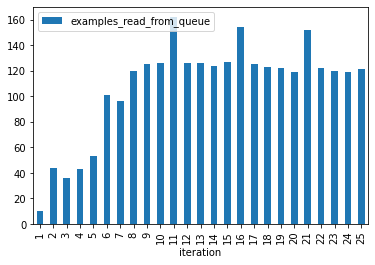

In [62]:
perf_data.plot.bar(x='iteration', y='examples_read_from_queue')

<AxesSubplot:xlabel='iteration'>

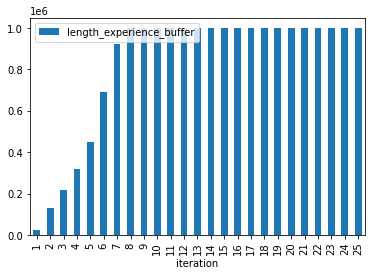

In [63]:
perf_data.plot.bar(x='iteration', y='length_experience_buffer')

<AxesSubplot:xlabel='iteration'>

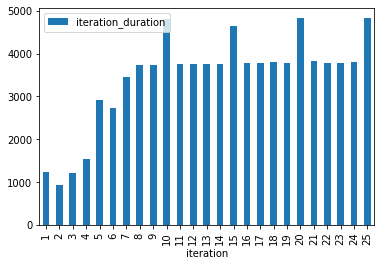

In [64]:
perf_data.plot.bar(x='iteration', y='iteration_duration')

In [65]:
rndm_data = pd.read_csv(os.path.join(DATA_DIRECTORY, f'{TIMESTAMP}_random_player_game_stats.csv'))
rndm_data['timestamp'] = pd.to_datetime(perf_data['timestamp'])
rndm_data.set_index('iteration')
rndm_data.head()

,iteration,timestamp,wins,losses,draws,nnet_cumul_rewards,random_cumul_rewards
0,1,1970-01-01 00:00:01.643392298,1.0,4.0,11.0,-0.666667,0.666667
1,5,1970-01-01 00:00:01.643393232,4.0,5.0,7.0,-0.333333,0.333333
2,10,1970-01-01 00:00:01.643394449,2.0,6.0,8.0,-0.500000,0.500000
3,15,1970-01-01 00:00:01.643395996,7.0,3.0,6.0,1.000000,-1.000000
4,20,1970-01-01 00:00:01.643398922,2.0,2.0,12.0,0.000000,0.000000


In [66]:
hrstc_data = pd.read_csv(os.path.join(DATA_DIRECTORY, f'{TIMESTAMP}_heuristic_player_game_stats.csv'))
hrstc_data['timestamp'] = pd.to_datetime(perf_data['timestamp'])
hrstc_data.set_index('iteration')
hrstc_data.head()

,iteration,timestamp,wins,losses,draws,nnet_cumul_rewards,random_cumul_rewards
0,1,1970-01-01 00:00:01.643392298,0.0,16.0,0.0,-16.000000,16.000000
1,5,1970-01-01 00:00:01.643393232,0.0,16.0,0.0,-14.166667,14.166667
2,10,1970-01-01 00:00:01.643394449,0.0,16.0,0.0,-12.666667,12.666667
3,15,1970-01-01 00:00:01.643395996,0.0,16.0,0.0,-14.000000,14.000000
4,20,1970-01-01 00:00:01.643398922,0.0,14.0,2.0,-8.833333,8.833333


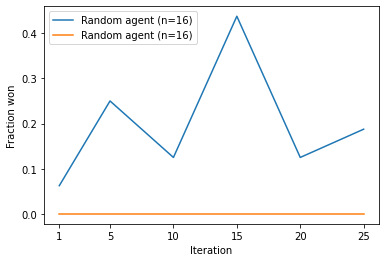

In [67]:
rndm_n_games = int(rndm_data['wins'][0] + rndm_data['losses'][0] + rndm_data['draws'][0])
hrstc_n_games = int(rndm_data['wins'][0] + rndm_data['losses'][0] + rndm_data['draws'][0])

rndm_fraction_won = rndm_data.apply(lambda row: row['wins'] / rndm_n_games, axis=1).to_list()
hrstc_fraction_won = hrstc_data.apply(lambda row: row['wins'] / hrstc_n_games, axis=1).to_list()

plt.plot(rndm_data['iteration'], rndm_fraction_won,  label=f'Random agent (n={rndm_n_games})')
plt.plot(rndm_data['iteration'], hrstc_fraction_won,  label=f'Random agent (n={hrstc_n_games})')
plt.xticks(rndm_data['iteration'])
plt.xlabel('Iteration')
plt.ylabel(f'Fraction won')
plt.legend()
plt.show()

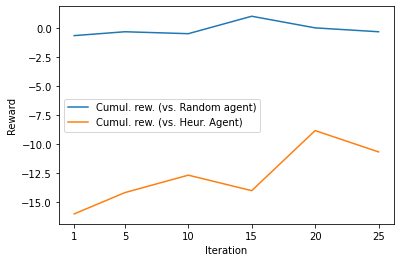

In [68]:
plt.plot(rndm_data['iteration'], rndm_data['nnet_cumul_rewards'],  label=f'Cumul. rew. (vs. Random agent)')
plt.plot(rndm_data['iteration'], hrstc_data['nnet_cumul_rewards'],  label=f'Cumul. rew. (vs. Heur. Agent)')
plt.xticks(rndm_data['iteration'])
plt.xlabel('Iteration')
plt.ylabel(f'Reward')
plt.legend()
plt.show()